## BCIS 5110 Analysis of JD Data

In [ ]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### We will analyze JD Data in the rest of our assignments.
The objective: to build models to accurately predict delivery times for customer orders.<br>
The data: We need the following tables from the JD.com data<br>
        1. Order<br>
        2. User<br>
        3. Delivery<br>
        4. Inventory<br>
        5. Network<br>        

#### Assignment 8 include Q1 - Q10.

1. Import necessary packages.

In [125]:
import pandas as pd

2. Read in the five csv files.

In [126]:
order_data_df = pd.read_csv('JD_order_data.csv')
user_data_df = pd.read_csv('JD_user_data.csv')
delivery_data_df = pd.read_csv('JD_delivery_data.csv')
inventory_data_df = pd.read_csv('JD_inventory_data.csv')
network_data_df = pd.read_csv('JD_network_data.csv')

3. Display a sample of each data frame. How many observations? How many columns? What are the column names? (Use code to display such information.)

In [127]:
data_frames = [order_data_df,user_data_df,delivery_data_df,inventory_data_df,network_data_df]
data_frame_names = ["order_data_df","user_data_df","delivery_data_df","inventory_data_df","network_data_df"]

for i,df in enumerate(data_frames):
    print(f"Dataframe: {data_frame_names[i]}\n")
    print(df.head())
    print(f"Number of observations: {len(df)}")
    print(f"Number of columns: {len(df.columns)}")
    print("\ncolumn names:")
    for column in df.columns:
        print(column)
    print("-"*100)
    print("\n")

Dataframe: order_data_df

     order_ID     user_ID      sku_ID  order_date             order_time  \
0  d0cf5cc6db  0abe9ef2ce  581d5b54c1  2018-03-01  2018-03-01 17:14:25.0   
1  7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
2  f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
3  8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
4  d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   

   quantity  type promise  original_unit_price  final_unit_price  \
0         1     2       -                 89.0              79.0   
1         1     1       2                 99.9              53.9   
2         1     1       2                 78.0              58.5   
3         1     1       2                 61.0              35.0   
4         1     1       1                 78.0              53.0   

   direct_discount_per_unit  quantity_discount_per_unit  \
0                       0.0                      

4. Check for missing values of columns of each dataframe. You can use sum() (instead of any()) to find out the number of missing values. Which variables have missing values?

In [129]:
data_frames = [order_data_df,user_data_df,delivery_data_df,inventory_data_df,network_data_df]
data_frame_names = ["order_data_df","user_data_df","delivery_data_df","inventory_data_df","network_data_df"]

for i, df in enumerate(data_frames):
    missing_values = df.isnull().sum()
    print(f"{data_frame_names[i]} :")
    
    if missing_values.sum() == 0:
        print("Missing values not found..!!")
    else:
        print("Variables with missing values:")
        for column, count in missing_values.items():
            if count > 0:
                print(f"{column}: {count} missing values")
                
    print("\n")

order_data_df :
Missing values not found..!!


user_data_df :
Missing values not found..!!


delivery_data_df :
Missing values not found..!!


inventory_data_df :
Missing values not found..!!


network_data_df :
Missing values not found..!!




5. Check the promise variable in orders table. What unusual values do you notice? What do you think it means?

In [130]:
order_data_df['promise'].unique()

#Explanation:
# In the promise column of the orders table we observe "-" values 
# This "-" value indicates that the values are missing in the promise column of the orders dataframe

array(['-', '2', '1', '3', '4', '5', '6', '7', '8'], dtype=object)

6. How many observations for each value in 'promise' variable? What information can you draw from this?

In [131]:
unique_values = order_data_df['promise'].value_counts()
print("Unique values and their counts:")
print(unique_values)

# Explanation
# We can infer that there are 208583 "-" values in the promise column and "1" value is present  157509 times and so and so forth
#208583 "-" values represent that there are 208583 missing values in the promise column of the orders dataframe

Unique values and their counts:
-    208583
1    157509
2    109990
3     33176
4     23882
5     10054
6      3039
8      2374
7      1382
Name: promise, dtype: int64


7. Select only two variables: 'type' and 'promise' from order table. Sort it by variable 'type' in descending order. What do you observe from the results? (check the first 10 and last 10 observations.) Think about the meaning of the type variable.

In [132]:
columns = order_data_df[['type','promise']]
sorted_data = columns.sort_values(by='type', ascending = False)

print("First 10 observations:")
print(sorted_data.head(10))

print("\n Last 10 observations:")
print(sorted_data.tail(10))

'''
Explanation:
'type' column values 2 has no values in the promise column
'type' column values 1 has values of promise 1 through 8
'''

First 10 observations:
        type promise
0          2       -
308329     2       -
308358     2       -
308357     2       -
308356     2       -
308355     2       -
308354     2       -
308353     2       -
308352     2       -
308351     2       -

 Last 10 observations:
        type promise
334636     1       1
334633     1       1
334626     1       1
334632     1       1
334631     1       1
116820     1       2
116821     1       2
116822     1       1
334627     1       1
274994     1       2


"\nExplanation:\n'type' column values 2 has no values in the promise column\n'type' column values 1 has values of promise 1 through 8\n"

8. Merge order and delivery tables, using inner merge. What does inner merge mean? How many observations are there in the merged dataset? Compared with the number of observations in the original order and delivery table, what can you say about the match between orders and deliveries?

In [133]:
merged_data = pd.merge(order_data_df, delivery_data_df, on='order_ID', how = 'inner')
print("Number of observations in the merged data set:", len(merged_data))
print("Number of observations in the order data set:", len(order_data_df))
print("Number of observations in the delivery data set:", len(delivery_data_df))

'''
Number of observations in the merged data set: 326862
Number of observations in the order data set: 549989
Number of observations in the delivery data set: 293229

In comparison to the order data set 549989 and the "delivery" data set 293229, 
there are fewer observations in the combined data collection 326862. Data loss or mismatched records 
are shown by the discrepancy between the number of observations in the combined data set and the original data sets.

'''


Number of observations in the merged data set: 326862
Number of observations in the order data set: 549989
Number of observations in the delivery data set: 293229


'\nNumber of observations in the merged data set: 326862\nNumber of observations in the order data set: 549989\nNumber of observations in the delivery data set: 293229\n\nIn comparison to the order data set 549989 and the "delivery" data set 293229, \nthere are fewer observations in the combined data collection 326862. Data loss or mismatched records \nare shown by the discrepancy between the number of observations in the combined data set and the original data sets.\n\n'

9. Merge order and delivery tables, using right merge. What does right merge mean? How many obervations are there in the merged dataset? Do all delivery records have matched order information?

In [134]:
merged_data_right = pd.merge(order_data_df, delivery_data_df, on='order_ID', how = 'right')
print("Number of observations in the right merged dataset:", len(merged_data_right))
print("Number of observations in the delivery dataset:", len(delivery_data_df))
print("Number of observations in the order dataset:", len(order_data_df))

'''
Number of observations in the right merged dataset: 326862
Number of observations in the delivery dataset: 293229
Number of observations in the order dataset: 549989

There are 326862 observations in the right combined data set. 
This indicates that just the matching entries from the "orders" dataset are included, and all records from the delivery dataset are included.
Whether or not the delivery records contain matching order records, all of the delivery records from the delivery dataset are included in the correctly merged dataset.
On the other hand, only the orders with corresponding delivery records from the 'orders' datset are included in the correct merged dataset.


'''

Number of observations in the right merged dataset: 326862
Number of observations in the delivery dataset: 293229
Number of observations in the order dataset: 549989


'\nNumber of observations in the right merged dataset: 326862\nNumber of observations in the delivery dataset: 293229\nNumber of observations in the order dataset: 549989\n\nThere are 326862 observations in the right combined data set. \nThis indicates that just the matching entries from the "orders" dataset are included, and all records from the delivery dataset are included.\nWhether or not the delivery records contain matching order records, all of the delivery records from the delivery dataset are included in the correctly merged dataset.\nOn the other hand, only the orders with corresponding delivery records from the \'orders\' datset are included in the correct merged dataset.\n\n\n'

10. Merge order and delivery tables, using left merge. What does left merge mean? How many obervations are there in the merged dataset? Compare the number of observations of the merged table with the original order table, what can you say about the match between orders and deliveries?

In [135]:
merged_data_left = pd.merge(order_data_df, delivery_data_df, on='order_ID', how = 'left')
print("The number of the observations for the left merged data:", len(merged_data_left))
print("The number of the observations for the  delivery data:", len(delivery_data_df))
print("The number of the observations for the order data:", len(order_data_df))

'''
The number of the observations for the left merged data: 550017
The number of the observations for the  delivery data: 293229
The number of the observations for the order data: 549989

There are 550017 observations in the left combined dataset. 
This indicates that only the matching record from the delivery dataset is included, and all entries from the ordered dataset are included.
Whether or not they have matching delivery records, all order records from the 'orders' dataset are included in the left merged dataset.
On the other hand, only the deliveries connected to order records from the 'delivery' dataset are included in the left merged dataset. 

'''

The number of the observations for the left merged data: 550017
The number of the observations for the  delivery data: 293229
The number of the observations for the order data: 549989


"\nThe number of the observations for the left merged data: 550017\nThe number of the observations for the  delivery data: 293229\nThe number of the observations for the order data: 549989\n\nThere are 550017 observations in the left combined dataset. \nThis indicates that only the matching record from the delivery dataset is included, and all entries from the ordered dataset are included.\nWhether or not they have matching delivery records, all order records from the 'orders' dataset are included in the left merged dataset.\nOn the other hand, only the deliveries connected to order records from the 'delivery' dataset are included in the left merged dataset. \n\n"

### Assignment 9 starts here. Q11 - Q20.

In this part, we prepare the data for analysis.

11. First, we need to clean the merged order and delivery table.<br>
Identify the table from the inner merge in Q8. Take a look at it. You may find there are two variables: type_x and type_y, which were not in the original two tables.<br>
The reason is that there is a type variable in both orders and delivery tables. The merge keeps both and assigned x and y suffix to them.<br>
Check the meaning of the two variables in our data description.<br>
To make the two variables consistent, we can replace the values of one variable to match the other.

In [136]:
def solve(merged_data, order_data_df, delivery_data_df):
    # Initialize an empty list to store column names.
    temp = []

    # Iterate through each column name in the merged_data DataFrame.
    for col in merged_data.columns:
        # Check if the current column is not in both order_data_df and delivery_data_df.
        if col not in order_data_df.columns and col not in delivery_data_df.columns:
            # If the column is unique to merged_data, add it to the temp list.
            temp.append(col)

    # Return the list of unique columns.
    return temp

# Call the function with the three DataFrames as arguments.
result = solve(merged_data, order_data_df, delivery_data_df)

# Print the unique columns found in merged_data.
print("Variables present in merged_data but not in order and delivery tables:", result)

Variables present in merged_data but not in order and delivery tables: ['type_x', 'type_y']


In [137]:
# Printing the unique values in the 'type_x' column of merged_data
print('Unique values in type_x:', merged_data['type_x'].unique())

# Printing the unique values in the 'type_y' column of merged_data
print('Unique values in type_y:', merged_data['type_y'].unique())

# Assuming merged_data resulted from an inner merge in Q8; now aligning 'type_x' values with 'type_y'
merged_data['type_x'] = merged_data['type_y']

Unique values in type_x: [1 2]
Unique values in type_y: [1 0]


Then compare the values of the two variables are the same.

In [138]:
# Displaying a message to indicate the replacement of 'type_x' values with 'type_y' values
print('Replaced type_x with type_y values:')

# Printing the updated unique values in the 'type_x' column after replacement
print('Unique values in type_x:', merged_data['type_x'].unique())

# Printing the unique values in the 'type_y' column for comparison
print('Unique values in type_y:', merged_data['type_y'].unique())

Replaced type_x with type_y values:
Unique values in type_x: [1 0]
Unique values in type_y: [1 0]


If they are, please drop one of them.

In [139]:
# Dropping the 'type_y' column from merged_data
merged_data = merged_data.drop(columns=['type_y'])

# Renaming the column 'type_x' to 'type' in merged_data
merged_data = merged_data.rename(columns={'type_x': 'type'})

# Printing the unique values in the newly renamed 'type' column
print('Unique values in type:', merged_data['type'].unique())

Unique values in type: [1 0]


12. We need to remove the orders that <br>
1) has a single item; <br>
2) the item is a gift item;<br>

The reason is that those orders might have come from other product categories and only use products from current category as a gift. We do not have information about those orders.

We first find orders with order_ID only appears once in the data, which indicates this order contains a single item.<br>
Hint: you may use .duplicated() method to mark that. Think about which value of the argument 'keep' you want to choose. Consider saving the outcome as a variable.

In [140]:
# Identify and store duplicate 'order_ID' values in 'merged_data', marking all occurrences as duplicates.
result = merged_data['order_ID'].duplicated(keep=False)

# Print the first five entries of the duplication check results, along with a reset index for clarity.
print(result.head().reset_index())

   index  order_ID
0      0     False
1      1     False
2      2     False
3      3     False
4      4     False


Then we filter the data to remove those orders of a single gift item. Save the changes.

In [141]:
# Add a new column 'item_count' to 'merged_data', which counts the number of 'type' entries per 'order_ID'.
merged_data['item_count'] = merged_data.groupby('order_ID')['type'].transform('count')

# Filter 'merged_data' to create a new DataFrame 'f_data' containing only orders with more than one item.
f_data = merged_data[merged_data['item_count'] > 1]

# Drop the 'item_count' column from 'f_data' as it's no longer needed after the filtering step.
f_data = f_data.drop(columns=['item_count'])

# Print the first five rows of 'f_data' for a quick preview of the filtered data.
print(f_data.head())

     order_ID     user_ID      sku_ID  order_date             order_time  \
5  89286e5fd9  79154d0001  6717b7c979  2018-03-01  2018-03-01 22:18:41.0   
6  89286e5fd9  79154d0001  01c9d91829  2018-03-01  2018-03-01 22:18:41.0   
7  72585b87a6  d5e8910932  d829f03a28  2018-03-01  2018-03-01 15:28:49.0   
8  72585b87a6  d5e8910932  5f58bfd286  2018-03-01  2018-03-01 15:28:49.0   
9  9c65b6264b  2021a86702  068f4481b3  2018-03-01  2018-03-01 00:12:07.0   

   quantity  type promise  original_unit_price  final_unit_price  ...  \
5         1     1       1                  0.0               0.0  ...   
6         1     1       1                129.0             129.0  ...   
7         2     1       1                 79.9              40.9  ...   
8         1     1       1                 79.9              37.9  ...   
9         1     1       1                298.0             208.0  ...   

   quantity_discount_per_unit  bundle_discount_per_unit  \
5                         0.0                

13. Next, we remove orders with multiple packages. Hint: You may groupby order_ID, find the number of unique package_ID ('nunique') and then use transform() to broadcast the value to all record. Save the results as a new variable. Use the variable value to filter.

In [142]:
# Add a new column 'unique_package_count' to 'f_data', counting unique 'package_ID' values per 'order_ID'.
f_data['unique_package_count'] = f_data.groupby('order_ID')['package_ID'].transform('nunique')

# Create a new DataFrame 'final_data' by filtering 'f_data' to keep only orders with exactly one unique package.
final_data = f_data[f_data['unique_package_count'] == 1]

# Remove the 'unique_package_count' column from 'final_data' as it's no longer needed after filtering.
final_data = final_data.drop(columns=['unique_package_count'])

# Print the first five rows of 'final_data' to preview the data after these operations.
print(final_data.head())


     order_ID     user_ID      sku_ID  order_date             order_time  \
5  89286e5fd9  79154d0001  6717b7c979  2018-03-01  2018-03-01 22:18:41.0   
6  89286e5fd9  79154d0001  01c9d91829  2018-03-01  2018-03-01 22:18:41.0   
7  72585b87a6  d5e8910932  d829f03a28  2018-03-01  2018-03-01 15:28:49.0   
8  72585b87a6  d5e8910932  5f58bfd286  2018-03-01  2018-03-01 15:28:49.0   
9  9c65b6264b  2021a86702  068f4481b3  2018-03-01  2018-03-01 00:12:07.0   

   quantity  type promise  original_unit_price  final_unit_price  ...  \
5         1     1       1                  0.0               0.0  ...   
6         1     1       1                129.0             129.0  ...   
7         2     1       1                 79.9              40.9  ...   
8         1     1       1                 79.9              37.9  ...   
9         1     1       1                298.0             208.0  ...   

   quantity_discount_per_unit  bundle_discount_per_unit  \
5                         0.0                

14. Now we process time-related variables: order_date, order_time, ship_out_time, arr_station_time, and arr_time. <br>
First change all of them to Timestamp data type. <br>
Get the day of the month from the order_date and save it to a new variable 'order_day'. <br>
Get the hour of the order_time and save it to a new variable 'order_hour'.<br>
Caculate the delivery time by minus arr_time with order_time. <br>

In [171]:
#Assumption is that final_data is the DataFrame to be processed
# Converting time-related variables to Timestamp data type
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])
merged_data['order_time'] = pd.to_datetime(merged_data['order_time'])
merged_data['ship_out_time'] = pd.to_datetime(merged_data['ship_out_time'])
merged_data['arr_station_time'] = pd.to_datetime(merged_data['arr_station_time'])
merged_data['arr_time'] = pd.to_datetime(merged_data['arr_time'])


In [172]:
# Extract the day of the month from 'order_date' and save it to 'order_day'
merged_data['order_day'] = merged_data['order_date'].dt.day

In [173]:
# Extract the hour from 'order_time' and save it to 'order_hour'
merged_data['order_hour'] = merged_data['order_time'].dt.hour

In [174]:
# Calculate the delivery time by subtracting 'arr_time' from 'order_time'
merged_data['delivery_time'] = merged_data['arr_time'] - merged_data['order_time']

In [175]:
print(merged_data.head())

     order_ID     user_ID      sku_ID order_date          order_time  \
0  7444318d01  33a9e56257  067b673f2b 2018-03-01 2018-03-01 11:10:40   
1  f973b01694  4ea3cf408f  623d0a582a 2018-03-01 2018-03-01 09:13:26   
2  8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01 2018-03-01 21:29:50   
3  d43a33c38a  4829223b6f  623d0a582a 2018-03-01 2018-03-01 19:13:37   
4  e0f5386d87  0b07cae293  589c2b865b 2018-03-01 2018-03-01 21:09:15   

   quantity  type promise  original_unit_price  final_unit_price  ...  \
0         1     1       2                 99.9              53.9  ...   
1         1     1       2                 78.0              58.5  ...   
2         1     1       2                 61.0              35.0  ...   
3         1     1       1                 78.0              53.0  ...   
4         1     1       1                 79.9              38.9  ...   

        ship_out_time    arr_station_time            arr_time  item_count  \
0 2018-03-01 13:00:00 2018-03-02 08:00:00 2018-03-0

15. We will transform the delivery time to hours. Hint: You can use total_seconds() method to turn it into seconds and find hours. Use apply() to apply a function for the transformation.

In [177]:
merged_data['delivery_time_hours'] = merged_data['delivery_time'].apply(lambda x: x.total_seconds() / 3600)
print(merged_data.head())

     order_ID     user_ID      sku_ID order_date          order_time  \
0  7444318d01  33a9e56257  067b673f2b 2018-03-01 2018-03-01 11:10:40   
1  f973b01694  4ea3cf408f  623d0a582a 2018-03-01 2018-03-01 09:13:26   
2  8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01 2018-03-01 21:29:50   
3  d43a33c38a  4829223b6f  623d0a582a 2018-03-01 2018-03-01 19:13:37   
4  e0f5386d87  0b07cae293  589c2b865b 2018-03-01 2018-03-01 21:09:15   

   quantity  type promise  original_unit_price  final_unit_price  ...  \
0         1     1       2                 99.9              53.9  ...   
1         1     1       2                 78.0              58.5  ...   
2         1     1       2                 61.0              35.0  ...   
3         1     1       1                 78.0              53.0  ...   
4         1     1       1                 79.9              38.9  ...   

     arr_station_time            arr_time  item_count  hour  originValue  \
0 2018-03-02 08:00:00 2018-03-02 14:00:00           

16. Find the total number of packages between the origin distribution center and the destination center. What do you observe from those pairs of highest traffic? <br>
Hint: You may group by the distribution centers and count the unique number of packages.<br>
You can use reset_index() method to turn the groupby aggregation results into a regular dataframe for later operations.

In [149]:
# Group 'final_data' by origin and destination distribution centers ('dc_ori' and 'dc_des'), and count unique package IDs in each group.
package_counts = final_data.groupby(['dc_ori', 'dc_des'])['package_ID'].nunique().reset_index()

# Sort the resulting 'package_counts' DataFrame in descending order based on the unique count of 'package_ID'.
sorted_package_counts = package_counts.sort_values(by='package_ID', ascending=False)

# Print the sorted DataFrame to view the distribution centers with the highest unique package traffic.
print(sorted_package_counts)


     dc_ori  dc_des  package_ID
26        5       5        3855
1         2       2        2589
56        9       9        2036
18        4       4        1992
86       24      24        1174
..      ...     ...         ...
151      55      33           1
205      58      52           1
145      53      31           1
74       13      14           1
109      32      27           1

[278 rows x 3 columns]


17. Now let's go back to the original orders table. Find the orders where gift_item equals to 1 (use filtering). What do you find about the orignal_unit_price and final_unit_price in the filtered dataset? Do we consider the 0 price as data errors?

In [150]:
# Filter 'order_data_df' to select only rows where 'gift_item' is 1, indicating they are gift orders.
gift_orders = order_data_df[order_data_df['gift_item'] == 1]

# Print the first five rows of the filtered 'gift_orders' DataFrame for a quick overview.
print(gift_orders.head())

# Generate and print descriptive statistics for 'original_unit_price' and 'final_unit_price' columns in 'gift_orders'.
print(gift_orders[['original_unit_price', 'final_unit_price']].describe())

      order_ID     user_ID      sku_ID  order_date             order_time  \
6   89286e5fd9  79154d0001  6717b7c979  2018-03-01  2018-03-01 22:18:41.0   
10  9c65b6264b  2021a86702  d3e31fdd6e  2018-03-01  2018-03-01 00:12:07.0   
23  8b71aa6716  9bb8b4c04f  a0e49f9966  2018-03-01  2018-03-01 22:08:44.0   
25  67b8f778f6  53dc20e68d  a0e49f9966  2018-03-01  2018-03-01 23:17:02.0   
26  67b8f778f6  53dc20e68d  c98d32ff09  2018-03-01  2018-03-01 23:17:02.0   

    quantity  type promise  original_unit_price  final_unit_price  \
6          1     1       1                  0.0               0.0   
10         2     1       1                  0.0               0.0   
23         1     1       1                  0.0               0.0   
25         1     1       1                  0.0               0.0   
26         1     1       1                  0.0               0.0   

    direct_discount_per_unit  quantity_discount_per_unit  \
6                        0.0                         0.0   
10

18. Still use the original order table. Filter the orders of a product (sku: 'a0e49f9966') on '2018-3-15'. Calculate the sales. <br>
Hint: we can multiply the quantity and final price columns together. <br>
The outcome will be a pandas series. <br>
The sum of the series will be the total sales. 

In [151]:
# Filter 'order_data_df' for orders of the product with SKU 'a0e49f9966' made on '2018-03-15'.
filtered_orders = order_data_df[(order_data_df['sku_ID'] == 'a0e49f9966') & (order_data_df['order_date'] == '2018-03-15')]

# Calculate the sales (quantity multiplied by final unit price) for each order in the filtered dataset.
sales_series = filtered_orders['quantity'] * filtered_orders['final_unit_price']

# Print the first five entries of the sales calculation for a quick preview.
print(sales_series.head())

# Sum the sales series to get the total sales value and print it.
total_sales = sales_series.sum()
print(f'Total Sales: {total_sales}')

Series([], dtype: float64)
Total Sales: 0.0


19. Now let's move to the user table. <br>
Create a pivot table that counts the customers based on their user_level and education.

In [152]:
# Create a pivot table from 'user_data_df' with 'user_level' and 'education' as rows and count of 'user_ID' as values.
temp = pd.pivot_table(user_data_df, values='user_ID', index=['user_level', 'education'], aggfunc='count')

# Rename the aggregated column in the pivot table to 'customer_count' for better readability.
temp = temp.rename(columns={'user_ID': 'customer_count'})

# Print the pivot table to display the count of users grouped by their user level and education.
print(temp)

                      customer_count
user_level education                
-1         -1                   2294
            3                      9
 0         -1                    145
            2                      7
            3                      8
            4                      1
 1         -1                  66391
            1                   3001
            2                  24182
            3                  35486
            4                    369
 2         -1                  28310
            1                   3270
            2                  32953
            3                  75907
            4                   1419
 3         -1                   8201
            1                   1260
            2                  13418
            3                  68944
            4                   4979
 4         -1                   4023
            1                    629
            2                   3606
            3                  37548
 

20. Answer one of your descriptive questions using groupby or pivot table.

In [153]:
print(order_data_df.groupby('sku_ID')['quantity'].mean())

sku_ID
000aa92b82    1.166667
000d4af39d    1.000000
000dc27e13    1.000000
000e84e3a7    1.000000
00104dbcd7    1.072289
                ...   
fff33f1633    1.500000
fff4328ec0    1.000000
fff84ed7ec    1.230769
fffe1bd280    1.207392
fffe6eb4df    1.000000
Name: quantity, Length: 9159, dtype: float64


### Assignment 10 starts here. Q21-Q30.
We now further explore the data, especially with graphs. We do not require formatting details of graph. The basics are enough.

21. Let's first look at the user table. Use info() to display basic information about the table. Check the Dtype column. What is the data type for variable user_level? This data type does not fit our description about this variable: <br>
"taking on a value of 0, 1, 2, 3, or 4, where a higher user_level is associated with a higher total purchase value in the past. For users who are enterprise users (e.g., small shops in rural areas or small businesses), the corresponding
user_level takes on a value of 10. However, for first-time purchasers, their user_level takes on
the value −1." <br>
The numbers do not have a numeric meaning, but refer to categories of customers. So, we would like to change the data type to categorical. Please use .astype('string') to change the data type of user_level.<br>
You may find similar situation for variables: education, city_level and purchase_power. Change their data type too.

In [154]:
import pandas as pd 

# Load the user data table
user_data_df = pd.read_csv('JD_user_data.csv')

# Display basic information about the user table
print("Before data type conversion")
print(user_data_df.info())

# We need to change the 'int' data type of user_level, education, city_level, and purchase_power to 'string'
columns_to_convert = ['user_level', 'education', 'city_level', 'purchase_power']

user_data_df[columns_to_convert] = user_data_df[columns_to_convert].astype('string')

#  Display the basic information after the data type conversion
print("\nAfter Data Type Conversion:")
print(user_data_df.info())

Before data type conversion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB
None

After Data Type Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   

22. 1) The meaning of '-1' for user_level is new customer. We will replace '-1' with 'New' and '10' with 'Bus'. Notice that -1 now changes to a string '-1'.

In [155]:
import pandas as pd 

# Load the user data table
user_data_df = pd.read_csv('JD_user_data.csv')

print('count of values before changing: ')
print(user_data_df['user_level'].value_counts())

# We need to change the 'int' data type of user_level, education, city_level, and purchase_power to 'string'
columns_to_convert = ['user_level', 'education', 'city_level', 'purchase_power']

user_data_df[columns_to_convert] = user_data_df[columns_to_convert].astype('string')
# '-1' for user_level means that it is a new customer. Replace -1 with new and '10' with 'Bus', we will notice that '-1 now changes to a string'-1'
user_data_df['user_level'] = user_data_df['user_level'].replace({'-1': 'New', '10': 'Bus'})

print('count of values after changing: ')
print(user_data_df['user_level'].value_counts())

count of values before changing: 
 2     141859
 1     129429
 3      96802
 4      85728
-1       2303
 10      1016
 0        161
Name: user_level, dtype: int64
count of values after changing: 
2      141859
1      129429
3       96802
4       85728
New      2303
Bus      1016
0         161
Name: user_level, dtype: Int64


2) The meaning of -1 in education, city_level and purchase_power is missing values. We will replace it with 'U', as missing value indicator of other variables like 'age', 'gender', etc.

In [156]:
print('Value count before changing: ')
print(user_data_df['education'].value_counts())
print(user_data_df['city_level'].value_counts())
print(user_data_df['purchase_power'].value_counts())
user_data_df['education'] = user_data_df['education'].replace({'-1': 'U'})
user_data_df['city_level'] = user_data_df['city_level'].replace({'-1': 'U'})
user_data_df['purchase_power'] = user_data_df['purchase_power'].replace({'-1': 'U'})
print('Value count after changing: ')
print(user_data_df['education'].value_counts())
print(user_data_df['city_level'].value_counts())
print(user_data_df['purchase_power'].value_counts())


Value count before changing: 
3     217908
-1    110369
2      74168
4      46693
1       8160
Name: education, dtype: Int64
2     138993
1      97177
-1     84764
3      69379
4      61110
5       5875
Name: city_level, dtype: Int64
2     239270
-1    100440
3      97891
4      10943
1       8605
5        149
Name: purchase_power, dtype: Int64
Value count after changing: 
3    217908
U    110369
2     74168
4     46693
1      8160
Name: education, dtype: Int64
2    138993
1     97177
U     84764
3     69379
4     61110
5      5875
Name: city_level, dtype: Int64
2    239270
U    100440
3     97891
4     10943
1      8605
5       149
Name: purchase_power, dtype: Int64


23. Let's move to the user table. Almost all user features are categorical variables. Make bar graphs to examine the distribution of "user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', and 'purchase_power'. You may consider using a loop. Based on the graphs, you may answer questions like these:
 1. What is the education level of the majority?
 2. Which age level has the most users?

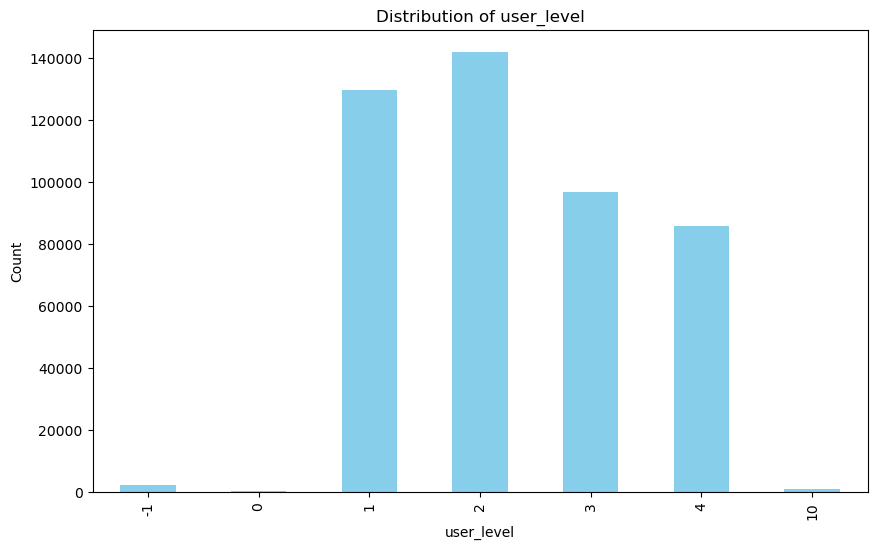

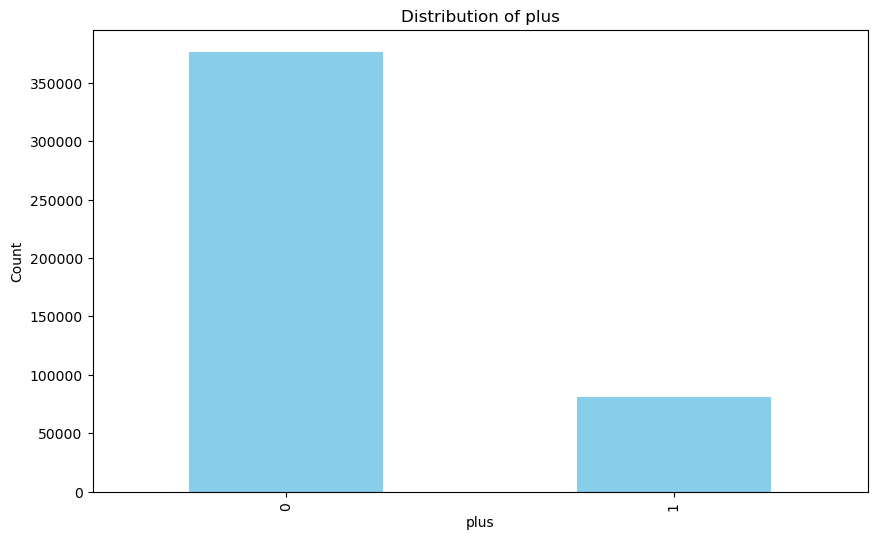

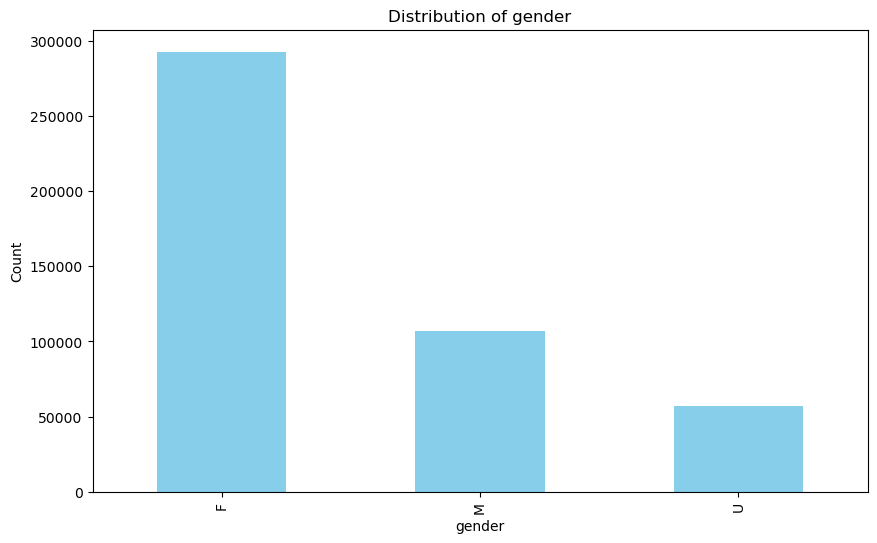

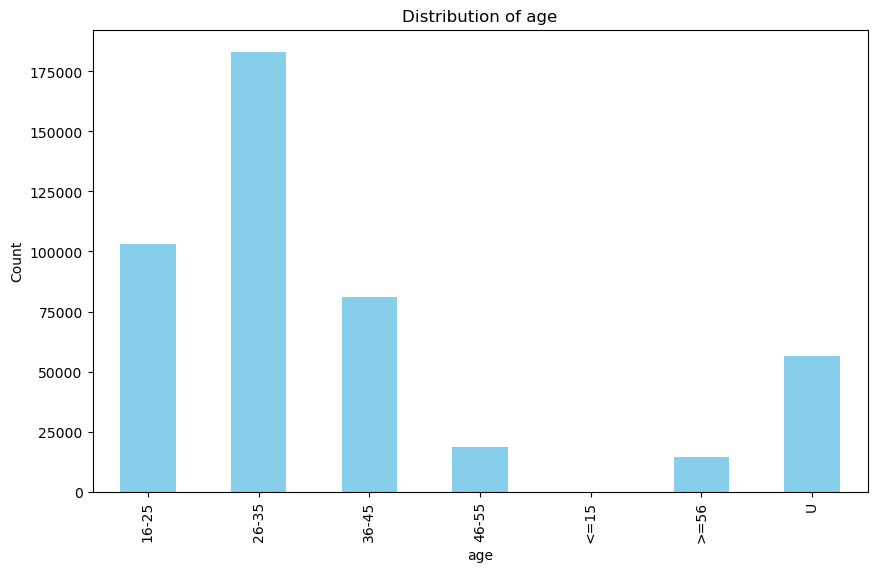

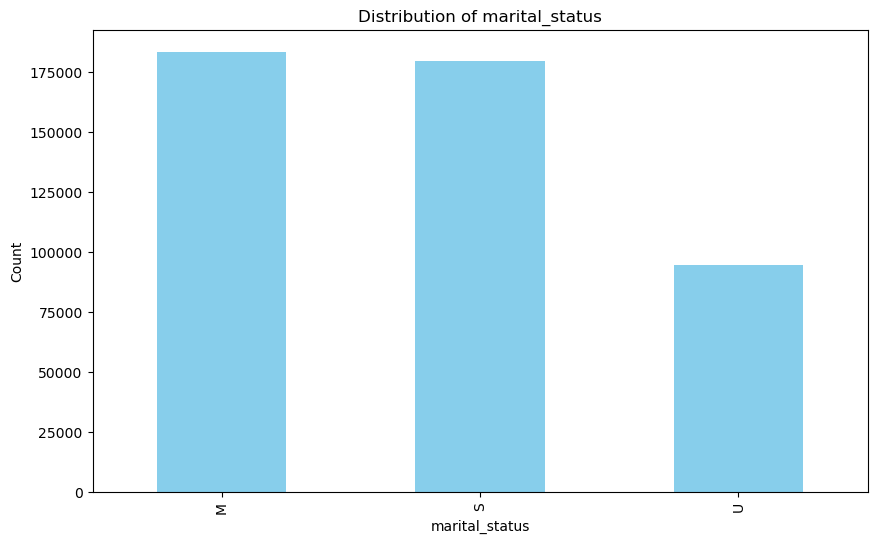

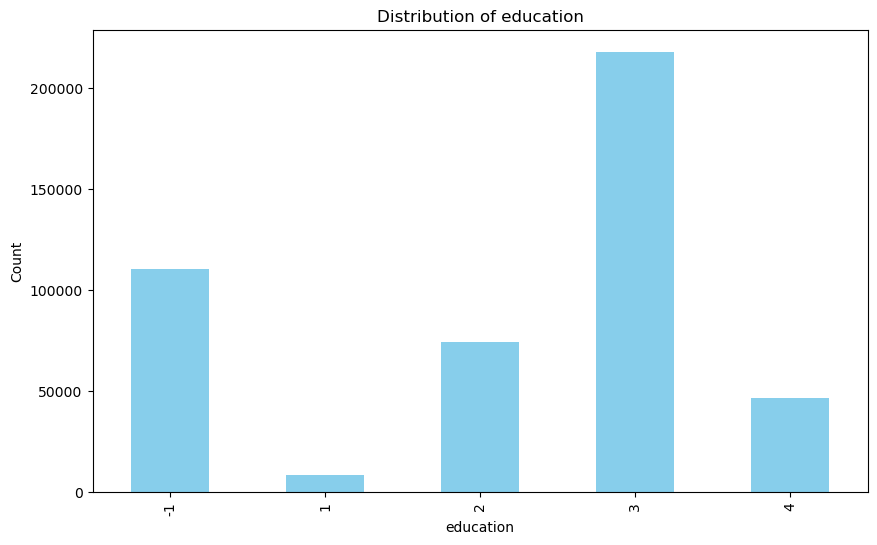

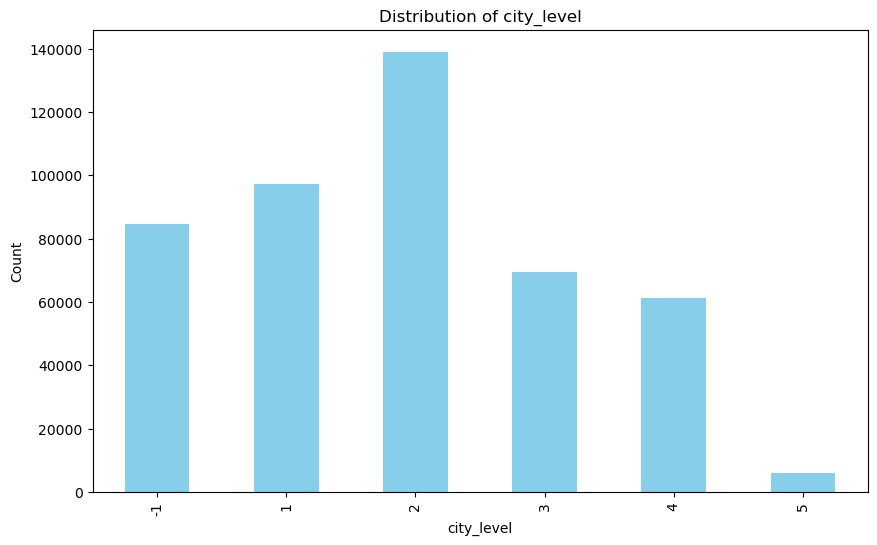

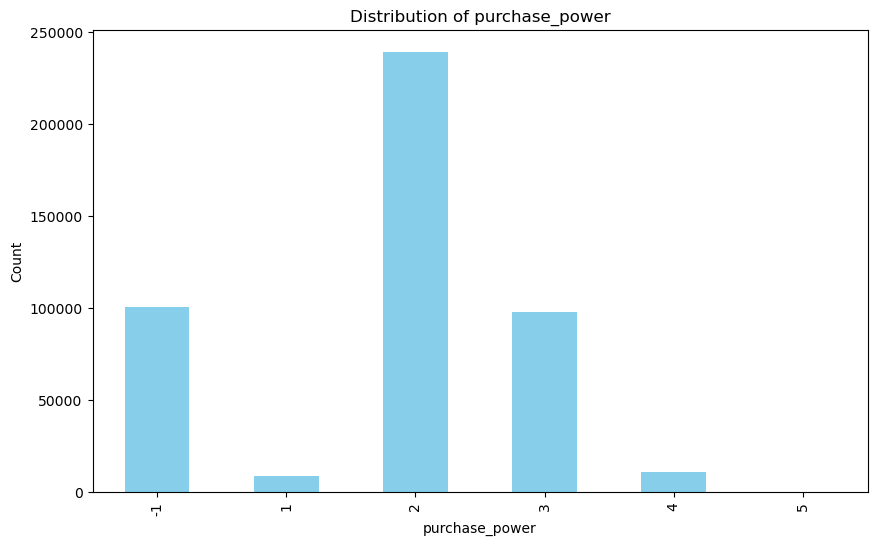

In [157]:
import pandas as pd
import matplotlib.pyplot as plt 

# Load the user data table
user_data_df = pd.read_csv('JD_user_data.csv')

# Define the categorical_columns
categorical_columns = ['user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']

# Create the bar graphs for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    user_data_df[column].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

25. Next we move to the table that resulted from Q11-Q15. Sum the quantity by day (we created this variable in Q14.) and save the results.
Create a line graph based on it. Hint: The outcome of the sum is a Pandas Series. Use the .index to get the day and .values to get the sum for the plot.<br>
Or you may use reset_index() to turn the results to a dataframe.
Which day has the most quantity sold? 

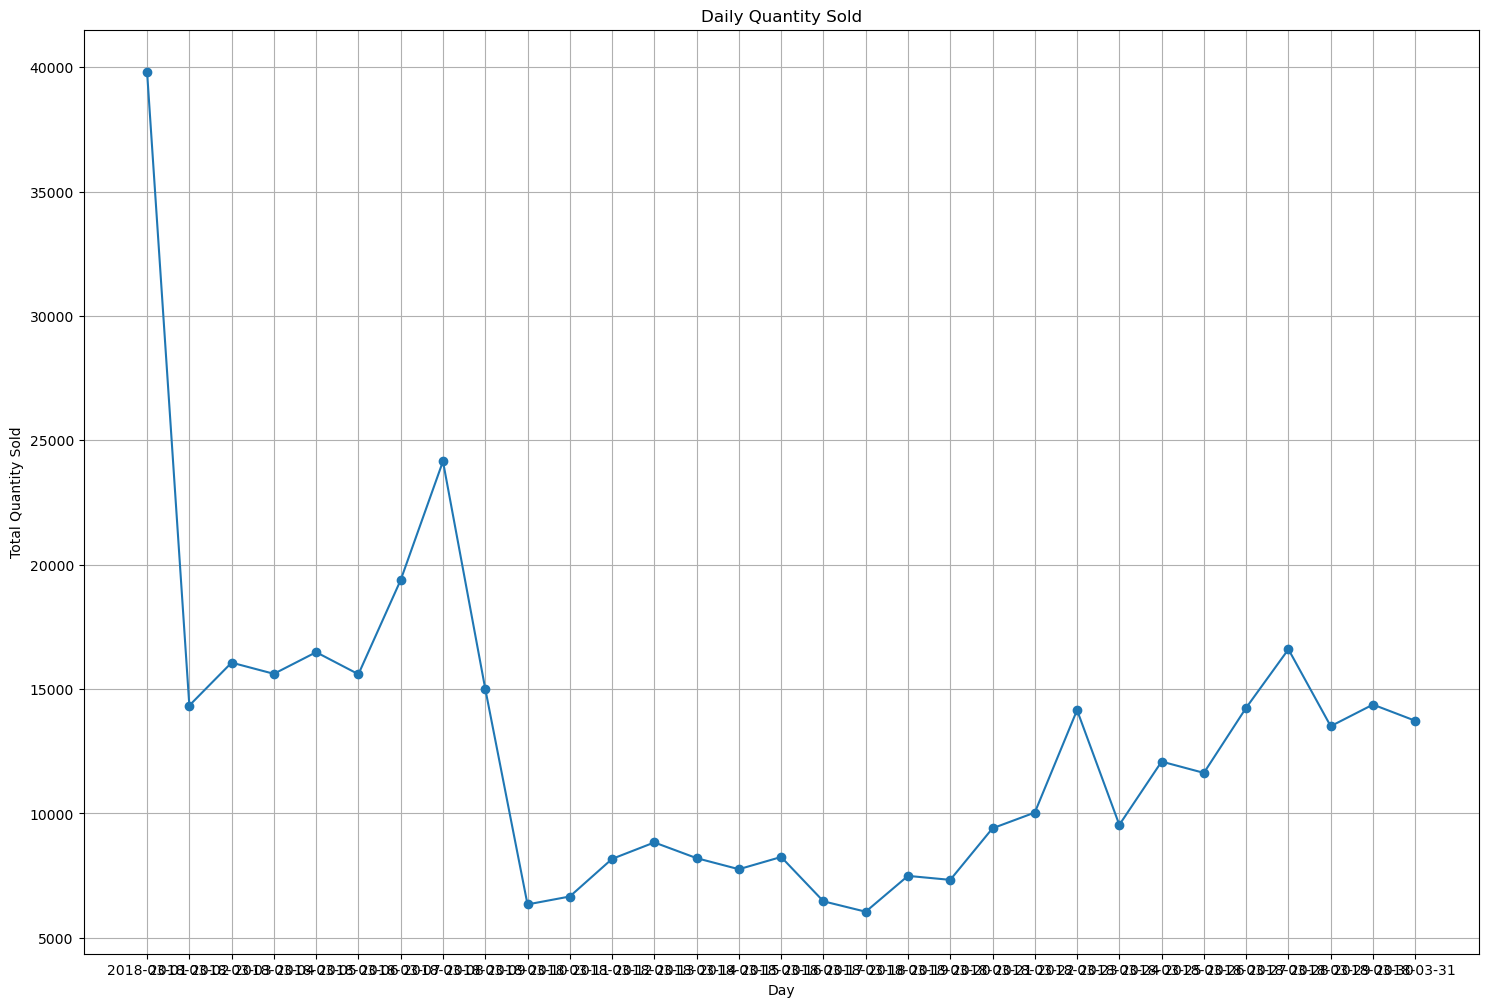

Day with the most quantity sold: 2018-03-01 Quantity: 39822


In [158]:
import matplotlib.pyplot as plt
daily_quantity_sum = merged_data.groupby('order_date')['quantity'].sum()
plt.figure(figsize=(18, 12))
plt.plot(daily_quantity_sum.index, daily_quantity_sum.values, marker='o')
plt.title('Daily Quantity Sold')
plt.xlabel('Day')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()
max_quantity_day = daily_quantity_sum.idxmax()
max_quantity_sold = daily_quantity_sum.max()
print("Day with the most quantity sold:" ,max_quantity_day, 'Quantity:',max_quantity_sold)

26. Repeat Q25 for variable 'order_hour' we created in Q14. When is the peak time for orders during a day? Can you describe the customer order trend over a day's time?

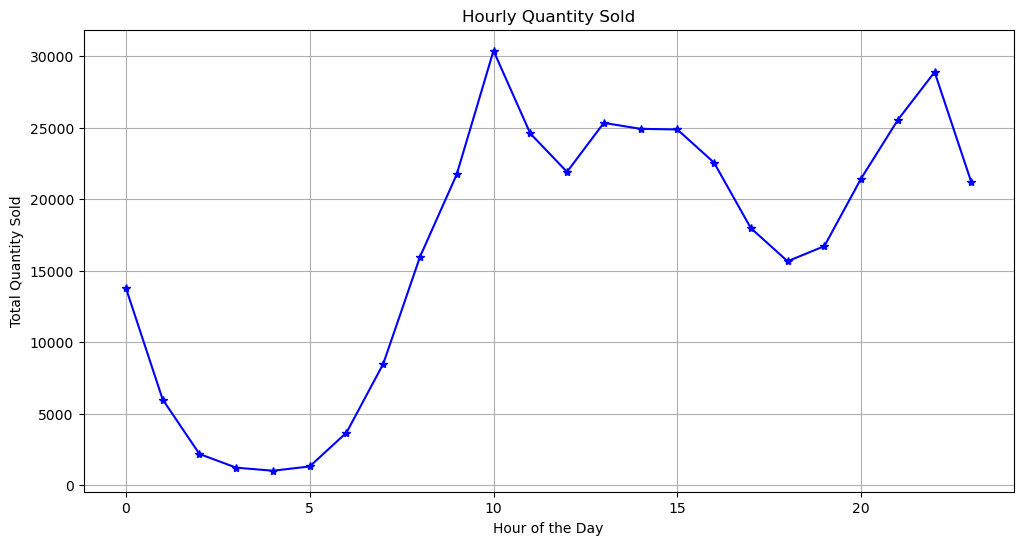

Peak Time for Orders: 10 Quantity: 30379


In [159]:
merged_data['order_time'] = pd.to_datetime(merged_data['order_time'])
merged_data['hour'] = merged_data['order_time'].dt.hour
hourly_quantity_sum = merged_data.groupby('hour')['quantity'].sum()
plt.figure(figsize=(12, 6))
plt.plot(hourly_quantity_sum.index, hourly_quantity_sum.values, marker='*', color='blue')
plt.title('Hourly Quantity Sold')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()
peak_hour = hourly_quantity_sum.idxmax()
peak_quantity_sold = hourly_quantity_sum.max()
print("Peak Time for Orders:" ,peak_hour, "Quantity:" ,peak_quantity_sold)

27. Examine variable original_unit_price .<br>

1) Using describe() to check the stastitics. What is min, max and median?

In [160]:
original_unit_price_stats = merged_data['original_unit_price'].describe()
print(original_unit_price_stats)
min_price = original_unit_price_stats['min']
max_price = original_unit_price_stats['max']
median_price = original_unit_price_stats['50%']
print("Minimum Original Unit Price:" ,min_price)
print("Maximum Original Unit Price:",max_price)
print("Median Original Unit Price:",median_price)

count    326862.000000
mean        116.821854
std          88.845661
min           0.000000
25%          66.000000
50%          80.000000
75%         149.000000
max        7130.000000
Name: original_unit_price, dtype: float64
Minimum Original Unit Price: 0.0
Maximum Original Unit Price: 7130.0
Median Original Unit Price: 80.0


2) Find out the percentage of observations whose original_unit_price is greater than 350. Delete those observations using filtering. We will use the filtered dataset from now on.

In [161]:
percentage_above_350 = (merged_data['original_unit_price'] > 350).mean() * 100
print("Percentage of observations with 'original_unit_price' > 350:", percentage_above_350)
filtered_data = merged_data[merged_data['original_unit_price'] <= 350]
print("Shape of the filtered dataset:", filtered_data.shape)

Percentage of observations with 'original_unit_price' > 350: 0.6290116318201565
Shape of the filtered dataset: (324806, 23)


3) Examine the distribution of original_unit_price, using bins range from 0 to 350, width 10. Which price range has the most orders?

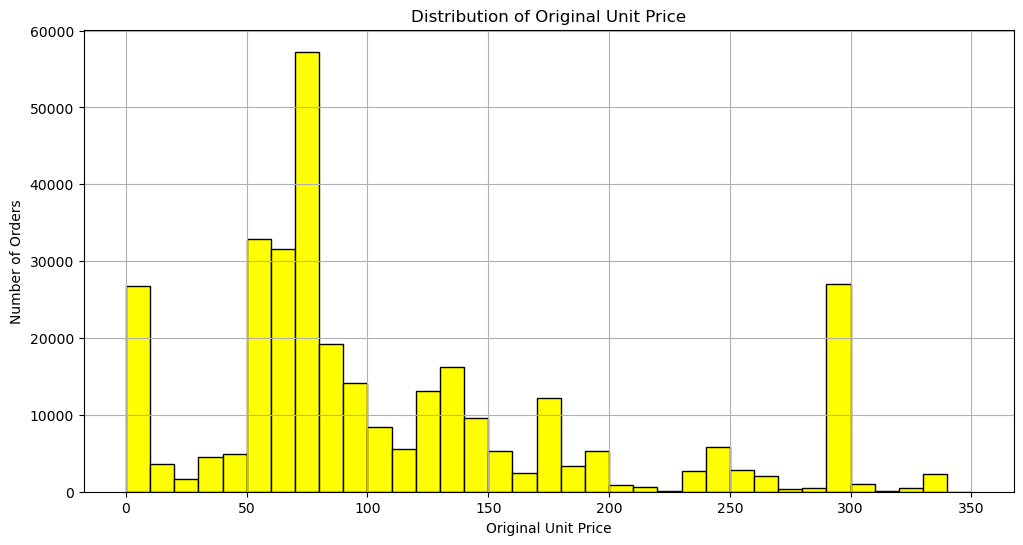

Price range with the most orders: (70.0, 80.0]


In [162]:
plt.figure(figsize=(12, 6))
plt.hist(filtered_data['original_unit_price'], bins=range(0, 360, 10), color='yellow', edgecolor='black')
plt.title('Distribution of Original Unit Price')
plt.xlabel('Original Unit Price')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()
most_orders_price_range = filtered_data['original_unit_price'].value_counts(bins=range(0, 360, 10)).idxmax()
print('Price range with the most orders:',most_orders_price_range)

28. Examine the distribution of final_unit_price, using bins range from -20 to 350, width 10. Comparing to original unit prices, how are the final prices different?

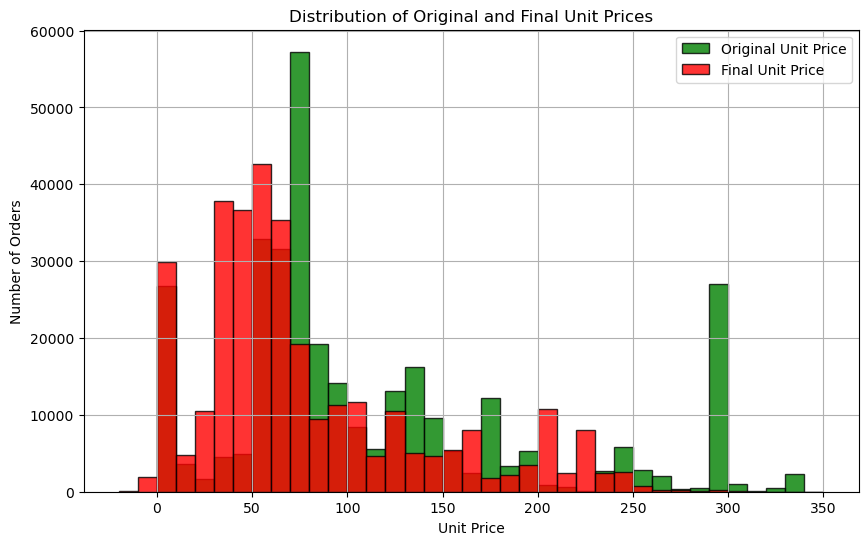

In [163]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['original_unit_price'], bins=range(0, 360, 10), color='green', edgecolor='black', alpha=0.8, label='Original Unit Price')
plt.hist(filtered_data['final_unit_price'], bins=range(-20, 360, 10), color='red', edgecolor='black', alpha=0.8, label='Final Unit Price')
plt.title('Distribution of Original and Final Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.show()

29. Create a new variable 'sales', which is equal to the multiplication of quantity and final unit price. Make a graph for sales by day as in Q25.

C:\Users\19403\AppData\Local\Temp\ipykernel_20268\2597236395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sales'] = filtered_data['quantity'] * filtered_data['final_unit_price']


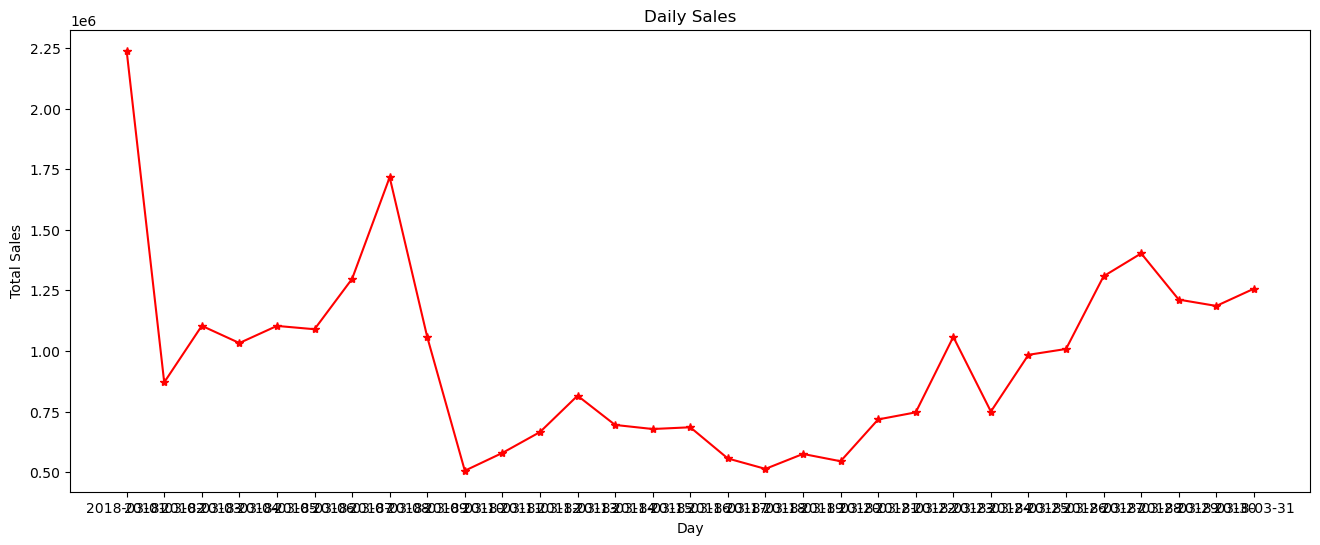

In [164]:
filtered_data['sales'] = filtered_data['quantity'] * filtered_data['final_unit_price']
daily_sales_sum = filtered_data.groupby('order_date')['sales'].sum()
plt.figure(figsize=(16, 6))
plt.plot(daily_sales_sum.index, daily_sales_sum.values, marker='*', linestyle='-', color='red')
plt.title('Daily Sales')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.show()

30. Try to answer one descriptive question you asked in your project initial report.

In [165]:
specific_sku = 'your_sku' 
specific_day = '2021-02-16'
filtered_data_sku_day = order_data_df[(order_data_df['sku_ID'] == specific_sku) & (order_data_df['order_date'] == specific_day)]
filtered_data_sku_day['sales'] = filtered_data_sku_day['quantity'] * filtered_data_sku_day['final_unit_price']
total_sales_sku_day = filtered_data_sku_day['sales'].sum()
print('Total sales for SKU', specific_sku, 'on', specific_day,': $', total_sales_sku_day)

Total sales for SKU your_sku on 2021-02-16 : $ 0.0


### Assignment 11 starts from here: Q31-Q40.
We only covered a small part of data exploration in Assignment 10. If you are interested, you can make many more graphs to understand the data. <br>
Next we intend to build models to predict delivery times.

We want to use two sets of features to make predictions.<br>
1. order effect: This class of predictors captures thevcharacteristics of an order that may impact deliveryvtime, such as the number of items (SKUs), order size (quantity), order type (1P or 3P), discount rate and the number of gift items.<br>
2. User effect: The process may prioritize certain customers over others, for example, customers with a PLUSmembership or higher past purchase values.<br>
Note: Actually, it will be better if we can include real-time workloads of distribution centers. It can be done with this dataset, but might be a little too much for us. So, we will leave that part out.

We need to further process the data to prepare the features.<br>
<b>Note: Here I have done this part. You need to change the name of DataFrame "order_delivery_inner' to your dataframe name that results from all the previous steps. Make sure you run the cells before you proceed.</b>

31. The dataset we have so far is based on order-items. Each row is an item in an order. Now we need to aggregate by order to match order information with delivery information. Afterwards, each row is about one delivery / one order because we have already removed orders that have multiple deliveries.

First, let's calculate order values by multiply price and quantity.

In [166]:
# Original value of items
merged_data['originValue'] = merged_data['original_unit_price'] \
                                        * merged_data['quantity']

# Final value of items                                    
merged_data['finalValue'] = merged_data['final_unit_price'] \
                                    * merged_data['quantity']                                   

In [210]:
merged_data.columns

Index(['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity',
       'type', 'promise', 'original_unit_price', 'final_unit_price',
       'direct_discount_per_unit', 'quantity_discount_per_unit',
       'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item',
       'dc_ori', 'dc_des', 'package_ID', 'ship_out_time', 'arr_station_time',
       'arr_time', 'item_count', 'hour', 'originValue', 'finalValue',
       'order_day', 'order_hour', 'delivery_time', 'delivery_time_hours'],
      dtype='object')

In [211]:
merged_data.head()

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,...,arr_station_time,arr_time,item_count,hour,originValue,finalValue,order_day,order_hour,delivery_time,delivery_time_hours
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40,1,1,2,99.9,53.9,...,2018-03-02 08:00:00,2018-03-02 14:00:00,1,11,99.9,53.9,1,11,1 days 02:49:20,26.822222
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26,1,1,2,78.0,58.5,...,2018-03-02 09:00:00,2018-03-02 13:00:00,1,9,78.0,58.5,1,9,1 days 03:46:34,27.776111
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50,1,1,2,61.0,35.0,...,2018-03-03 08:00:00,2018-03-04 11:00:00,1,21,61.0,35.0,1,21,2 days 13:30:10,61.502778
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37,1,1,1,78.0,53.0,...,2018-03-02 07:00:00,2018-03-02 11:00:00,1,19,78.0,53.0,1,19,0 days 15:46:23,15.773056
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15,1,1,1,79.9,38.9,...,2018-03-02 09:00:00,2018-03-02 12:00:00,1,21,79.9,38.9,1,21,0 days 14:50:45,14.845833


Next we aggregate by each order. <br>
Please pay attention to the variable names. They should be consistent with yours. Make changes when necessary. <br>

Variables that are the same across one order:<br>
user_ID<br>
order type - type_x<br>
delivery time - delivery_time<br>
order day - order_day<br>
order hour - order_hour<br>
<br>
<br>
Variables to be aggregated across one order:<br>
sku_ID - to count to calculate the number of different products<br>
quantity - to sum to calculate the order size<br>
originValue - to sum to calculate sales value with the original price<br>
finalValue - to sum to calculate final sales value<br>
discount rate<br>
gift_item - to sum to calculate the number of gift items<br>

Therefore, we need to do the following:<br>

1. For variables that are the same across one order, we can use the 'first' method to keep the value in the groupby result.<br>
2. For variables to be aggregated, we specify aggregation for each of them.<br>
3. We can use a dictionary to put all actions together.

In [178]:
agg_dict = {
    'user_ID': 'first',
    'type': 'first',
    'delivery_time': 'first',
    'order_day': 'first',
    'order_hour':'first',
    'sku_ID': 'count',
    'quantity': 'sum',
    'originValue': 'sum',
    'finalValue': 'sum',
    'gift_item': 'sum'
}

order_agg = merged_data.groupby('order_ID').agg(agg_dict).reset_index()
order_agg.head()

,order_ID,user_ID,type,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,gift_item
0,0000095025,57648ed1fc,1,0 days 22:48:26,19,11,1,1,230.0,176.2,0
1,00000e13eb,c113527e40,0,2 days 05:19:18,9,12,1,1,56.0,56.0,0
2,0000132b39,c4f5626c0d,1,0 days 22:29:25,13,16,1,1,89.0,85.0,0
3,000064fa67,99439045cb,1,0 days 08:03:43,2,10,2,2,298.0,208.0,1
4,0000bde331,20d84fc11a,1,0 days 21:37:06,17,14,1,1,59.9,39.9,0


32. Merge user table with this aggregated order table.

In [196]:
customer_order = pd.merge(order_agg, user_data_df, on = 'user_ID', how = 'inner')
customer_order.head()

,order_ID,user_ID,type,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,gift_item,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,0000095025,57648ed1fc,1,0 days 22:48:26,19,11,1,1,230.0,176.2,0,-1,2017-10,0,U,U,U,-1,-1,-1
1,00000e13eb,c113527e40,0,2 days 05:19:18,9,12,1,1,56.0,56.0,0,1,2017-08,0,U,U,U,-1,-1,-1
2,0000132b39,c4f5626c0d,1,0 days 22:29:25,13,16,1,1,89.0,85.0,0,2,2016-06,0,F,16-25,S,3,2,1
3,000064fa67,99439045cb,1,0 days 08:03:43,2,10,2,2,298.0,208.0,1,2,2016-01,0,F,16-25,S,3,1,2
4,0000bde331,20d84fc11a,1,0 days 21:37:06,17,14,1,1,59.9,39.9,0,2,2016-03,0,F,26-35,M,3,-1,2


In [197]:
customer_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293204 entries, 0 to 293203
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   order_ID           293204 non-null  object         
 1   user_ID            293204 non-null  object         
 2   type               293204 non-null  int64          
 3   delivery_time      293204 non-null  timedelta64[ns]
 4   order_day          293204 non-null  int64          
 5   order_hour         293204 non-null  int64          
 6   sku_ID             293204 non-null  int64          
 7   quantity           293204 non-null  int64          
 8   originValue        293204 non-null  float64        
 9   finalValue         293204 non-null  float64        
 10  gift_item          293204 non-null  int64          
 11  user_level         293204 non-null  int64          
 12  first_order_month  293204 non-null  object         
 13  plus               293204 non

33. We need to code a few more variables.

In [198]:
# First we remove the orders with originValue is 0
customer_order = customer_order[customer_order['originValue'] != 0]
customer_order.head()

,order_ID,user_ID,type,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,gift_item,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,0000095025,57648ed1fc,1,0 days 22:48:26,19,11,1,1,230.0,176.2,0,-1,2017-10,0,U,U,U,-1,-1,-1
1,00000e13eb,c113527e40,0,2 days 05:19:18,9,12,1,1,56.0,56.0,0,1,2017-08,0,U,U,U,-1,-1,-1
2,0000132b39,c4f5626c0d,1,0 days 22:29:25,13,16,1,1,89.0,85.0,0,2,2016-06,0,F,16-25,S,3,2,1
3,000064fa67,99439045cb,1,0 days 08:03:43,2,10,2,2,298.0,208.0,1,2,2016-01,0,F,16-25,S,3,1,2
4,0000bde331,20d84fc11a,1,0 days 21:37:06,17,14,1,1,59.9,39.9,0,2,2016-03,0,F,26-35,M,3,-1,2


In [199]:
# Discount rate
customer_order['dis_rate'] = (customer_order['originValue'] - customer_order['finalValue'])/customer_order['originValue']
# order_hour coded to be busy vs. not busy
customer_order['busy_hour'] = customer_order['order_hour'].apply(lambda h: 1 if 8<=h<=22 else 0)
customer_order.head()

,order_ID,user_ID,type,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,...,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power,dis_rate,busy_hour
0,0000095025,57648ed1fc,1,0 days 22:48:26,19,11,1,1,230.0,176.2,...,2017-10,0,U,U,U,-1,-1,-1,0.233913,1
1,00000e13eb,c113527e40,0,2 days 05:19:18,9,12,1,1,56.0,56.0,...,2017-08,0,U,U,U,-1,-1,-1,0.000000,1
2,0000132b39,c4f5626c0d,1,0 days 22:29:25,13,16,1,1,89.0,85.0,...,2016-06,0,F,16-25,S,3,2,1,0.044944,1
3,000064fa67,99439045cb,1,0 days 08:03:43,2,10,2,2,298.0,208.0,...,2016-01,0,F,16-25,S,3,1,2,0.302013,1
4,0000bde331,20d84fc11a,1,0 days 21:37:06,17,14,1,1,59.9,39.9,...,2016-03,0,F,26-35,M,3,-1,2,0.333890,1


34. Prepare data for analysis. The target variable is 'delivery_time'.<br>
Features: 'type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour'

In [200]:
customer_order['hourly_delivery_time'] = customer_order['delivery_time'].dt.total_seconds()/3600
Target = 'hourly_delivery_time'
features = ['type','sku_ID','quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour']

In [201]:
X = customer_order[features]
y = customer_order[Target]

35. Prepare the training and test datasets

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape


(224124, 8)

In [203]:
X_test.shape

(56031, 8)

In [204]:
y_train.shape

(224124,)

In [205]:
y_test.shape

(56031,)

36. Train a Decision Tree regression model.

In [206]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

37. Make predictions on the testing data.

In [207]:
y_Pred = tree_regressor.predict(X_test)
y_Pred

array([23.89138889, 21.52557724, 64.56478614, ..., 45.36681063,
       70.4215    , 24.19888301])

38. Evaluate the model using RMSE

In [208]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_Pred, squared=False)
print('RMSE:', rmse)

RMSE: 26.68951404064796


In [212]:
# To understand the RMSE, We check the statistics of the target variable.
customer_order['delivery_time'].describe()
# It seems the mean is about 34 hours. With RMSE being about 27, 
# the prediction seems not very good.
# If you are interested to explore more, you may try some other prediction methods to see 
# whether you can get better results.

count                       280155
mean     1 days 09:41:04.107469079
std      1 days 04:22:30.757980040
min              -1 days +07:25:00
25%                0 days 17:21:10
50%                0 days 23:33:42
75%                1 days 19:01:48
max               26 days 17:13:03
Name: delivery_time, dtype: object